In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Probability

## Question 1.1

In [2]:
dna1 = str(np.load('data/dna1.npy'))
dna2 = str(np.load('data/dna2.npy'))

In [3]:
#Finding probabilities of each nucleotide in dna1
A1_count = 0
T1_count = 0
C1_count = 0
G1_count = 0

for base1 in dna1:
    if base1.upper() == "A":
        A1_count += 1
    elif base1.upper() == "T":
        T1_count += 1
    elif base1.upper() == "C":
        C1_count += 1
    elif base1.upper() == "G":
        G1_count += 1
        
A1_prob = A1_count/len(dna1)
T1_prob = T1_count/len(dna1)
C1_prob = C1_count/len(dna1)
G1_prob = G1_count/len(dna1)

print(f"Summary of probablities for each nucleotide in the DNA sequence \"dna1\": \
\n 'A': {A1_prob} \n 'T': {T1_prob} \n 'C': {C1_prob} \n 'G': {G1_prob}")

#Checking that this code works using the count method
if A1_count == dna1.upper().count("A") and T1_count == dna1.upper().count("T") and \
C1_count == dna1.upper().count("C") and G1_count == dna1.upper().count("G"):
    print("Successfully checked that the results are the same as whether the " \
    + "count method were to be used.")

Summary of probablities for each nucleotide in the DNA sequence "dna1": 
 'A': 0.308125 
 'T': 0.29925 
 'C': 0.223625 
 'G': 0.169
Successfully checked that the results are the same as whether the count method were to be used.


In [4]:
#Finding probabilities of each nucleotide in dna2
A2_count = 0
T2_count = 0
C2_count = 0
G2_count = 0

for base2 in dna2:
    if base2.upper() == "A":
        A2_count += 1
    elif base2.upper() == "T":
        T2_count += 1
    elif base2.upper() == "C":
        C2_count += 1
    elif base2.upper() == "G":
        G2_count += 1
        
A2_prob = A2_count/len(dna2)
T2_prob = T2_count/len(dna2)
C2_prob = C2_count/len(dna2)
G2_prob = G2_count/len(dna2)

print(f"Summary of probablities for each nucleotide in the DNA sequence \"dna2\": \
\n 'A': {A2_prob} \n 'T': {T2_prob} \n 'C': {C2_prob} \n 'G': {G2_prob}")

#Checking that this code works using the count method
if A2_count == dna2.upper().count("A") and T2_count == dna2.upper().count("T") \
and C2_count == dna2.upper().count("C") and G2_count == dna2.upper().count("G"):
    print("Successfully checked that the results are the same as whether the " \
    + "count method were to be used.")

Summary of probablities for each nucleotide in the DNA sequence "dna2": 
 'A': 0.30875 
 'T': 0.3105 
 'C': 0.217 
 'G': 0.16375
Successfully checked that the results are the same as whether the count method were to be used.


## Question 1.2

In [5]:
#Finding probability of "TTTT" in dna1
TTTT1_count = 0

for base1 in range(len(dna1)-3):
    if dna1[base1:base1+4].upper() == "TTTT":
        TTTT1_count += 1
        
TTTT1_prob = TTTT1_count/(len(dna1)-3)

print(f"The probablity of \"TTTT\" in the DNA sequence \"dna1\" is \
{TTTT1_prob:.4f}.")

#Finding probability of "TTTT" in dna2
TTTT2_count = 0

for base2 in range(len(dna2)-3):
    if dna2[base2:base2+4].upper() == "TTTT":
        TTTT2_count += 1
        
TTTT2_prob = TTTT2_count/(len(dna2)-3)

print(f"The probablity of \"TTTT\" in the DNA sequence \"dna2\" is \
{TTTT2_prob:.4f}.")

The probablity of "TTTT" in the DNA sequence "dna1" is 0.0099.
The probablity of "TTTT" in the DNA sequence "dna2" is 0.0278.


In [6]:
#Testing probability of dna1 and dna2 based on independence in probability theory
print(f"Assuming that nucleotide probabilities are independent of previous \
nucleotides, \"dna1\" has a probability of {T1_prob**4:.4f} for \"TTTT\" whilst \
\"dna2\" has a probability of {T2_prob**4:.4f} for \"TTTT\".")

Assuming that nucleotide probabilities are independent of previous nucleotides, "dna1" has a probability of 0.0080 for "TTTT" whilst "dna2" has a probability of 0.0093 for "TTTT".


Based off of the probabilities calculated in the previous cell, the probability for "TTTT" is found by the P(T)^4. Using this assumption, the probability of "TTTT" in dna1 assuming independence from previous nucleotides (0.008) is more similar to the actual observed probability (0.0099), than the probability of "TTTT" in "dna2" assuming independence (0.0093) compared to its observed probability (0.0278). Therefore, "dna1" is the synthetic sequence and "dna2" is the real sequence.

# Entropy

## Question 2.1

In [7]:
#Function to calculate xlog2(x) of each x probability in the array

def h(x):
    if x <= 0:
        return x
    else:
        return - x*np.log2(x)
    
    
#Function to calculate the entropy of all the probability distribution of x
    
def entropy(arr):
    return sum(list(map(h, arr)))

## Question 2.2

In [8]:
d = np.load('data/annualprobs.npy')
d.shape

(6, 12)

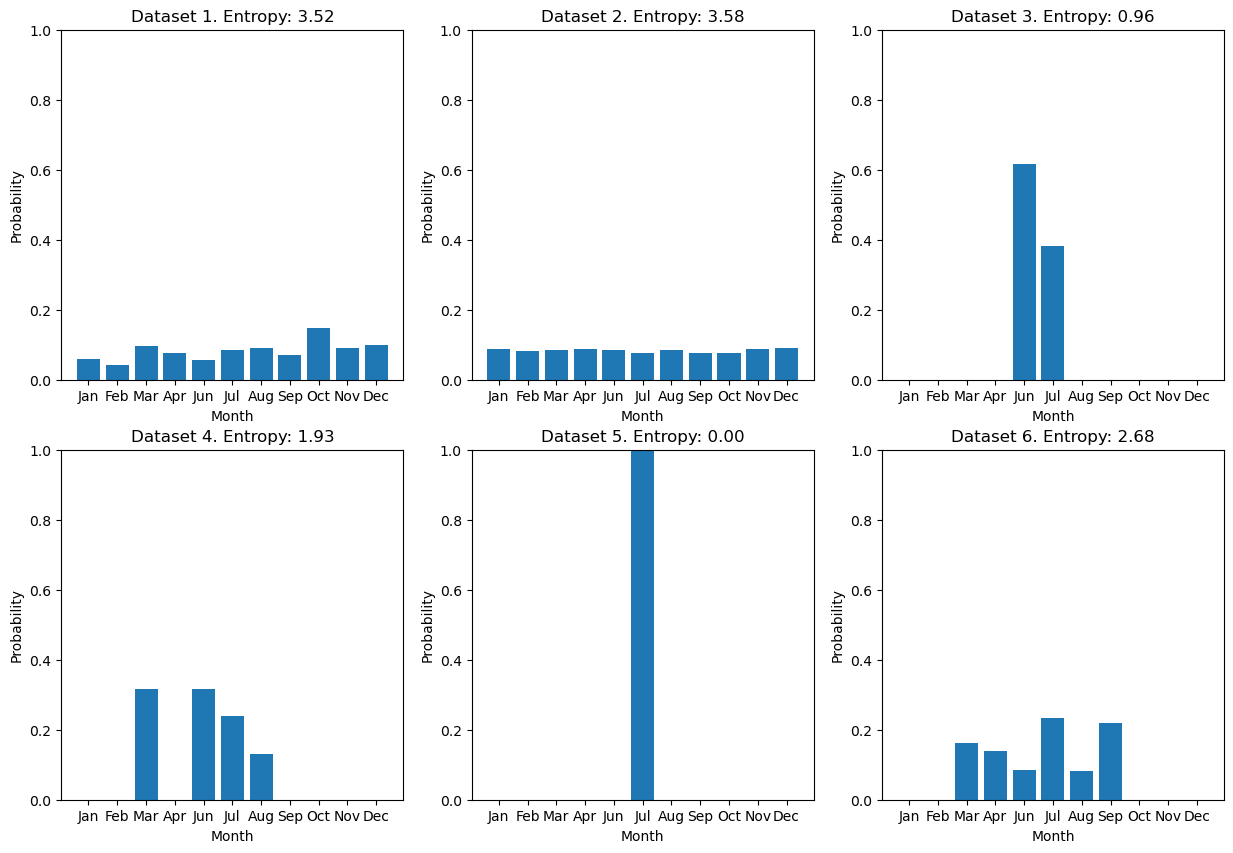

In [9]:
#Bar plots of all months in each x distribution

plt.figure(figsize=(15,10))

months = ["Jan", "Feb", "Mar", "Apr", "Mar", "Jun", "Jul", "Aug", "Sep", "Oct", \
          "Nov", "Dec"]

for num in range(len(d)):
    H = entropy(d[num])
    plt.subplot(2,3,num+1)
    plt.bar(months,d[num])
    plt.title(f"Dataset {num+1}. Entropy: {H:.2f}")
    plt.ylabel("Probability")
    plt.xlabel("Month")
    plt.ylim(0,1)
    
plt.show()

I would expect that the distributions with most of the probability assigned to lower number of months (more concentrated) would have the lowest entropy, as there is less uncertainty as to which month is most probable in this context. However, the more distributed the probability is over the months, the higher the entropy, meaning that there is more uncertainty as to which month the event would lie on. Since entropy measures the average amount of information content, a distribution like number 5 needs no information for each month probability since all the probability lies on July, so its entropy is the lowest, 0. However, distributions 1-2 have probabilities distributed across all the months fairly uniformly, so result in the highest entropy.

# Measuring the dependence between two random variables


## Question 3.1

In [10]:
d = np.load('data/XandY.npy')

In [11]:
#Function to calculate the correlation coefficient

def corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x-x_mean)*(y-y_mean))
    
    denominator = ((np.sum((x-x_mean)**2))*(np.sum((y-y_mean)**2)))**(1/2)

    return numerator/denominator

## Question 3.2

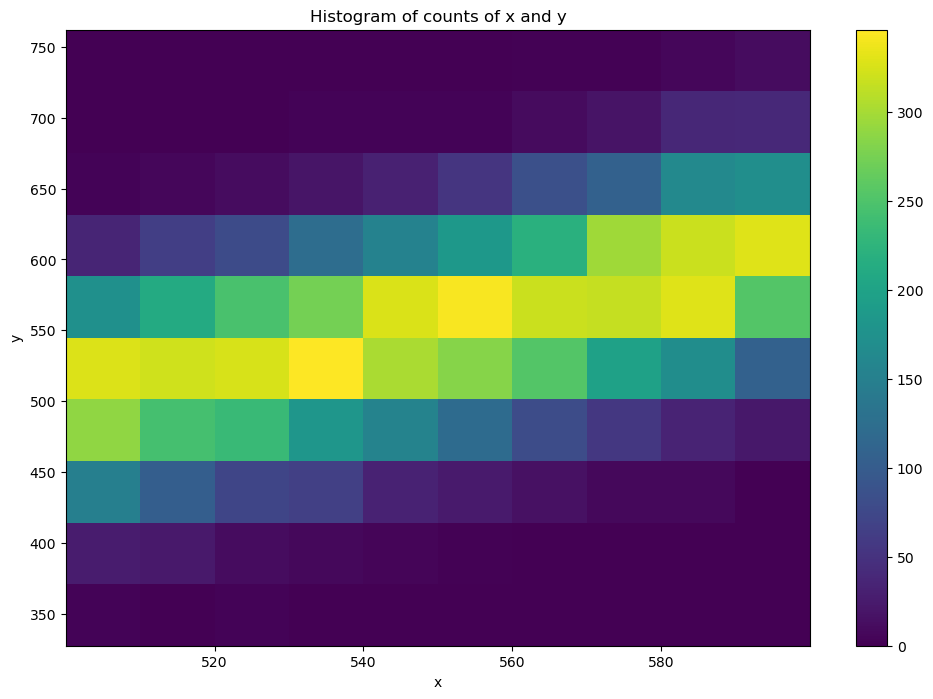

In [12]:
#Plotting histogram of the first dataset

plt.figure(figsize=(12,8))

nxy, xedges, yedges = np.histogram2d(d[0], d[1], (10,10))

plt.imshow(np.rot90(nxy), extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], \
           aspect='auto')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Histogram of counts of x and y")
plt.colorbar()

plt.show()

## Question 3.3

In [13]:
#Calculating conditional entropy

def entropy_xy(x, y):
    nxy, xedges, yedges = np.histogram2d(x, y, (10,10))
    pxy = nxy/np.sum(nxy) #Probabilities of each bin, P(X, Y)
    px = np.sum(pxy, axis=1) #Summing probability of each x bin, P(X)
    
    def hxy(x_prob, xy_prob):
        if x_prob == 0 or xy_prob == 0:
            return 0
        else:
            return xy_prob*np.log2(x_prob/xy_prob)
    
    h_sum = 0
    for i in range(len(pxy[:,0])):
        for j in range(len(pxy[0])):
            h_sum += hxy(px[i], pxy[i,j])
            
    return h_sum

In [14]:
#Calculating normalized mutual information

def NMI(x, y):
    nxy, xedges, yedges = np.histogram2d(x, y, (10,10))
    pxy = nxy/np.sum(nxy) #Probabilities of each bin, P(X, Y)
    py = np.sum(pxy, axis=0) #Summing probability of each y bin, P(Y)
    
    return (entropy(py) - entropy_xy(x, y)) / entropy(py)

In [15]:
#Testing answers for the first dataset

print(f"The first dataset has a correlation coefficient of " \
      + f"{corr(d[0], d[1]):.3f} and a normalised mutual " \
      + f"information of {NMI(d[0], d[1]):.3f}.")

The first dataset has a correlation coefficient of 0.516 and a normalised mutual information of 0.085.


## Question 3.4

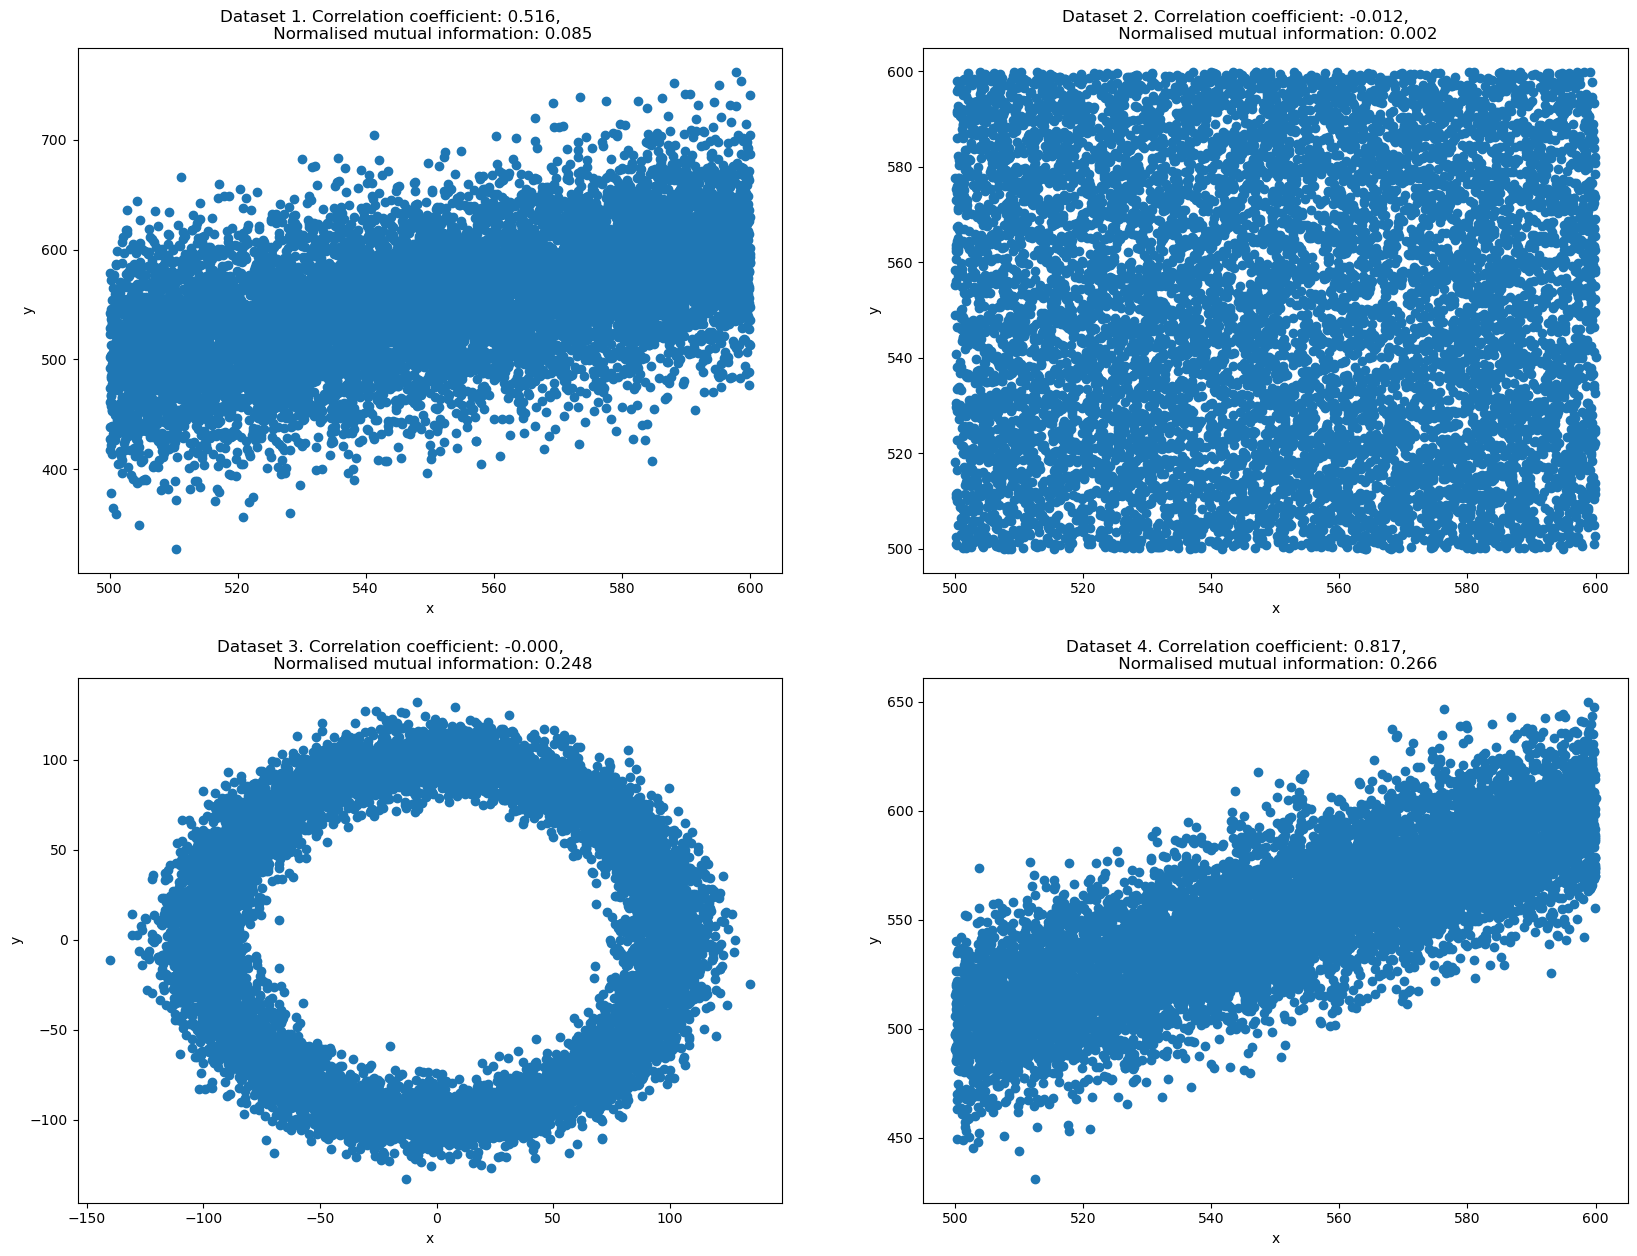

In [16]:
#Plotting each dataset as a scatterplot

plt.figure(figsize=(20,15))

for i in range(0,len(d),2):
    plt.subplot(2,2,int((i/2)+1))
    plt.scatter(d[i],d[i+1])
    plt.title(f"Dataset {int((i/2)+1)}. Correlation coefficient: " \
              + f"{corr(d[i],d[i+1]):.3f}, \
              \n Normalised mutual information: {NMI(d[i],d[i+1]):.3f}")
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

The correlation coefficient measures the linear relationship strength and direction of x and y. Positive correlation indicates that as x increases, y also increases. Negative correlation indicates that as x increases, y decreases. Datasets 1 and 4 both show a positive correlation because y increases as x increases. Dataset 2 shows points covering all ranges of x and y, showing no clear correlation so the coefficient is almost 0. Dataset 3 does show a relationship between x and y, however it is not linear (and so not simply positive or negative correlation). Therefore, the correlation coefficient of dataset 3 remains 0 as y does not change linearly to the increase of x. The normalised mutual information (NMI) shows how much information x is providing to estimate y, normalised to the range 0-1. Datasets that have a low or high linear correlation coefficient may not be fully indicative of the relationship between x and y, while the NMI may shed light on how x is used to predict y not solely based on a linear relationship. Datasets 1 and 2 have very low NMIs as for each x value, y is present in a large range of values, meaning x is not providing much information to predict y. However, datasets 3 and 4 have higher NMIs because for each value of x, the range of y is more condensed, meaning x gives more information as to what the estimate of y is. This shows that dataset 3 does show a relationship between x and y, that is simply non-linear. Regardless, all 4 datasets do not have a high NMI which means that the degree of dependence between x and y is not high in any, but is still higher in datasets 3 and 4 compared to 1 and 2.

To further understand NMI, using x and y values where each x only results in a single y value, the NMI is 1 as expected since x fully explains what the estimate of y is:

In [17]:
NMI([0,1,2,3,4,5,6,7,8,9,10],[2,3,4,5,6,7,8,9,10,11,12])

1.0